#                                  Projeto Ferramentas de Programação 2

## Bruno Baring e Lorena Vianna

## Tema: Análise dos registros de passageiros do Titanic

<img src="titanic.png">

Fonte dos dados : https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic/data?select=titanic1_submission.csv

Dados originais: 
- titanic1_submission : Contém a identificação do passageiro e a info se sobreviveu ou não. útil para a base de teste, que não contém esta info.
- test e train : Bases com as informações abaixo

|Variable|Definition|Key|Notes|
|:----:|:----:|:----:|:----:|
|survival|Survival|0 = No, 1 = Yes|null|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|A proxy for socio-economic status (SES). 1st = Upper. 2nd = Middle. 3rd = Lower|
|sex|sex|male, female||
|Age|Age in years||Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5|
|sibsp|# of siblings / spouses aboard the Titanic||Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored|
|parch|# of parents / children aboard the Titanic||Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.|
|fare|Passenger fare|||
|cabin|Cabin number|||
|embarked|Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|||


In [185]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
%matplotlib inline


## Esta análise foi dividida em alguns blocos que são descritos a seguir
### O primeiro bloco é relativo a importação e tratamento dos dados

In [2]:
# Importando as bases originais
ts = pd.read_csv('./titanic1_submission.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


In [3]:
ts.head(3)

,PassengerId,Survived
0,892,1
1,893,1
2,894,0


In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# Como para esta etapa do projeto não há necessidade de divisão entre as bases de treino e teste, as mesmas serão unificadas.
#1. incluindo a variárel "survived" a base de teste:
test2=pd.merge(test, ts, on="PassengerId", how="left")

In [14]:
test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [10]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [18]:
#juntando as duas bases, teste e treino num único dataframe
df=test2.append(train, ignore_index = True)

In [20]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [65]:
# criando uma nova coluna family, cujo objetivo é marcar se havia no navio algum familiar, ou seja, junção entre sibsp e parch
df['has_family_onboard'] = np.where((df['SibSp']>0) | (df['Parch']>0), 'Yes', 'No')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,has_family_onboard,married
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,No,Yes
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Yes,Yes
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,No,Yes
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,No,Yes
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Yes,Yes


In [69]:
#Criando uma nova coluna, com base no nome, para identififcar se o passageiro era casado ou solteiro.
married_condition = (df['Name'].str.contains('Mr.', regex=False)) | (df['Name'].str.contains('Mrs.', regex=False))
df['married'] = np.where(married_condition, 'Yes', 'No')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,has_family_onboard,married
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,No,Yes
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Yes,Yes
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,No,Yes
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,No,Yes
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Yes,Yes


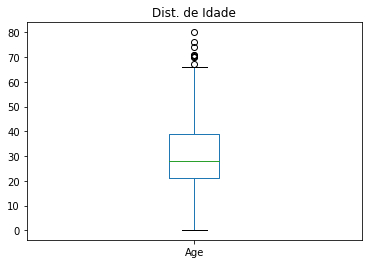

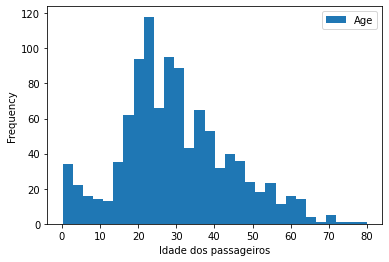

In [84]:
# Distribuição de idade
df_age = df[~df['Age'].isnull()]
df_age.plot(y='Age', kind='box', title= 'Dist. de Idade')
age_hist = df_age.plot(y='Age', kind='hist', bins=30);
age_hist.set_xlabel('Idade dos passageiros', fontsize=10);

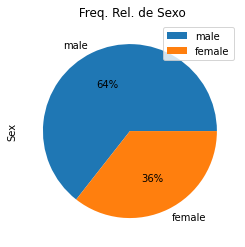

In [40]:
# proporção de homens e mulheres
df['Sex'].value_counts().plot(kind='pie',autopct='%1.0f%%', legend=True, title = ' Freq. Rel. de Sexo');

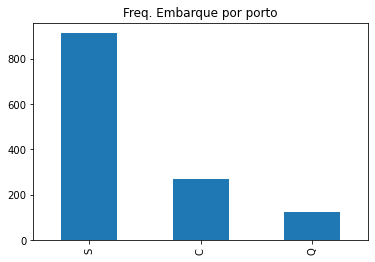

In [41]:
# Freq de embarques em cada porto
df['Embarked'].value_counts().plot(kind='bar',title = 'Freq. Embarque por porto');

<BarContainer object of 3 artists>

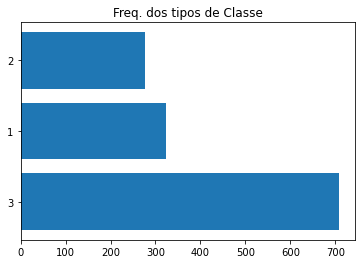

In [103]:
# Freq dos tipos de classe
# df['Pclass'].value_counts().plot(kind='bar',title = 'Freq. dos tipos de Classe');
# plt.bar()

# Mudar Pclass para string, para tirar os decimais e o 0.5
bar_data = df['Pclass'].apply(str).value_counts()
plt.title('Freq. dos tipos de Classe')
plt.barh(bar_data.index.values, bar_data.values)

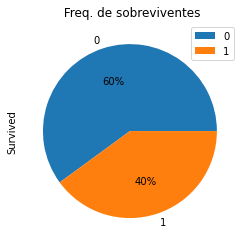

In [96]:
# proporção de sobreviventes
df['Survived'].value_counts().plot(kind='pie',autopct='%1.0f%%', legend=True, title = ' Freq. de sobreviventes');

# Bloco para identificar relações entre sobreviventes e não sobreviventes

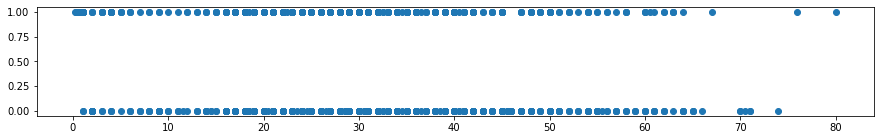

In [183]:
# Idade por sobreviventes e não sobreviventes
plt.figure(figsize=(15,2))
plt.scatter('Age', 'Survived', data=df)
# sns.scatterplot(data=df, x='Age', y='Survived')

In [ ]:
# Tipo de classe por sobreviventes e não sobreviventes

In [ ]:
# Porto de embarque sobreviventes e não sobreviventes

In [ ]:
# sobreviventes por posse de "parentes"

In [178]:
# Sexo por sobreviventes e não sobreviventes

In [134]:
# Tarifa X Sobreviventes

df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.031794
Pclass,-0.038354,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.158709
Age,0.028814,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.069044
SibSp,-0.055224,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.004345
Parch,0.008942,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.027705
Fare,0.031428,-0.558629,0.178740,0.160238,0.221539,1.000000,0.092525
Survived,0.031794,-0.158709,-0.069044,-0.004345,-0.027705,0.092525,1.000000


<AxesSubplot:>

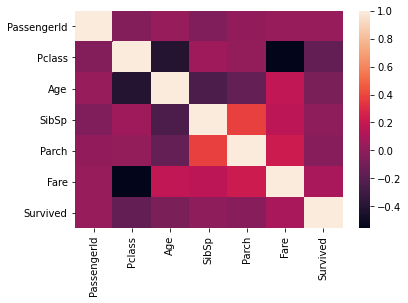

In [133]:
sns.heatmap(df.corr())

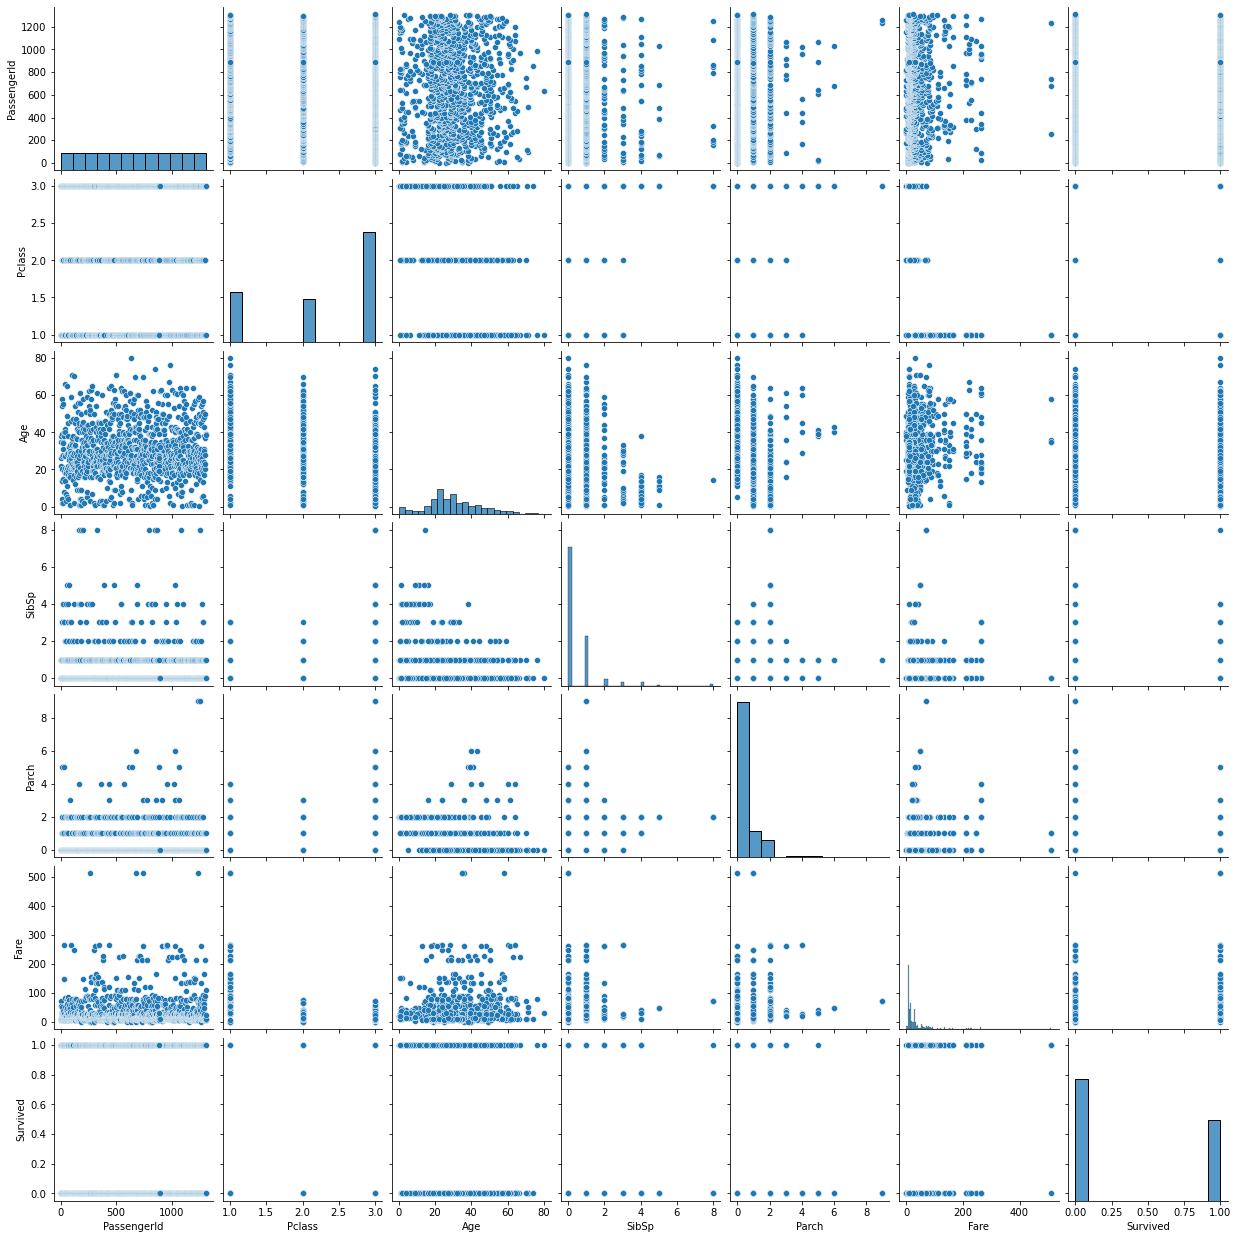

In [161]:
sns.pairplot(data=df) ## filtrar colunas certas

<AxesSubplot:>

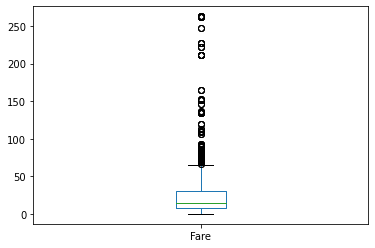

In [181]:
df_fare = df[df['Fare'] < 300]
df_fare.plot(y='Fare', kind='box')


(0.0, 600.0)

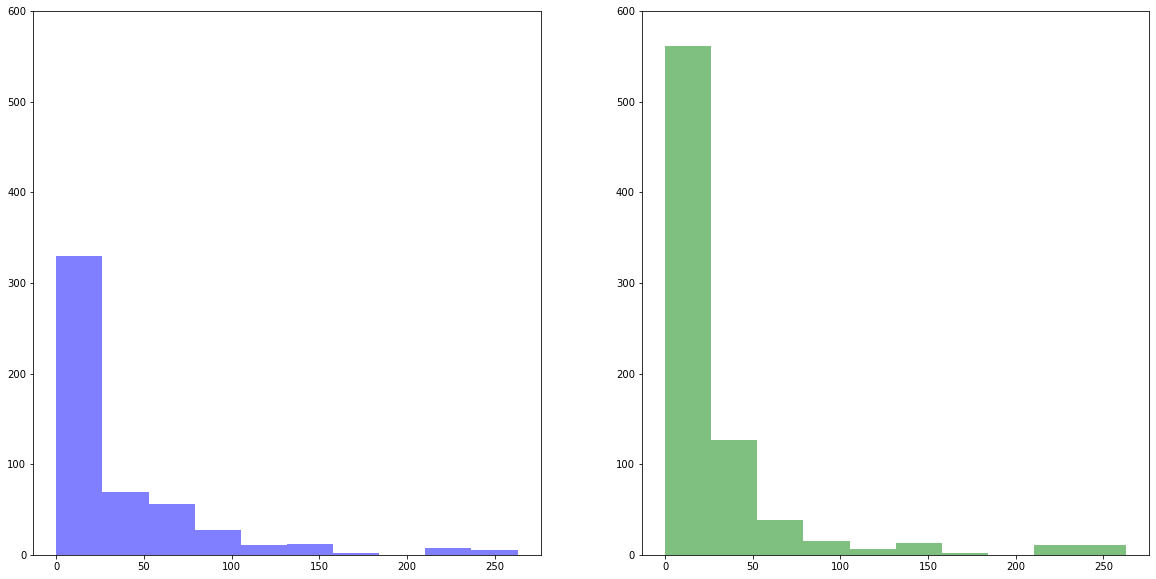

<Figure size 1080x144 with 0 Axes>

In [182]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# plt.figure(figsize=(20,15))
# plt.hist(bins=50, x=df_fare[df_fare['Survived'] == 1]['Fare'], alpha=1, color='blue')
# plt.hist(bins=50, x=df_fare[df_fare['Survived'] == 0]['Fare'], alpha=0.5, color='green')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.figure(figsize=(15,2))
ax1.hist(bins=10, x=df_fare[df_fare['Survived'] == 1]['Fare'], alpha=0.5, color='blue')
ax1.set_ylim([0, 600])
ax2.hist(bins=10, x=df_fare[df_fare['Survived'] == 0]['Fare'], alpha=0.5, color='green')
ax2.set_ylim([0, 600])

O projeto desde módulo será uma aplicação prática do conteúdo de visualização de dados no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) implementando gráficos para tornar o resultado visual. Lembre-se de explorar as bibliotecas estudadas neste módulo (Pandas, Matplotlib, Plotly, Seaborn)  
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
  
**Composição das duplas**  
As duplas estão descritas segundo o excel "Equipes" presente no google drive, na pasta "projeto"  
  
**Github**  
Na mesma planilha das duplas insiram o link para o github  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 10 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Entendimento do contexto em que se encaixa a base de dados
2. Uso de todas bibliotecas apresentadas neste módulo para criação de gráficos (ao menos um gráfico de cada biblioteca)
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários
4. Uso dos diferentes tipos de gráficos com as variáveis numéricas e categóricas 
5. Identificação e discussão de missings ou outliers na base de dados
6. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
08/06/2022  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**